In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('globaldataset.csv',encoding='latin1')

In [3]:
df

,year,country,region,city,location of attack,targtype,gang_name,motive,weaptype_txt,propvalue,propcomment,dbsource,attacktype
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Unknown,Named Civilian,MANO-D,Unknown,Unknown,Unknown,Unknown,PGIS,Assassination
1,1970,Mexico,North America,Mexico city,Unknown,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,Unknown,Unknown,Unknown,PGIS,Hostage Taking (Kidnapping)
2,1970,Philippines,Southeast Asia,Unknown,Unknown,Radio Journalist/Staff/Facility,Unknown,Unknown,Unknown,Unknown,Unknown,PGIS,Assassination
3,1970,Greece,Western Europe,Athens,Unknown,Embassy/Consulate,Unknown,Unknown,Unknown Explosive Type,Unknown,Unknown,PGIS,Bombing/Explosion
4,1970,Japan,East Asia,Fukouka,Unknown,Embassy/Consulate,Unknown,Unknown,Unknown,Unknown,Unknown,PGIS,Facility/Infrastructure Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191459,2018,Afghanistan,South Asia,Sorkhi Sang,The incident occurred in Argahandab district.,"Police Building (headquarters, station, school)",Taliban,Unknown,Arson/Fire,-99,A police outpost was damaged in this attack.,START Primary Collection,Facility/Infrastructure Attack
191460,2018,Afghanistan,South Asia,Khwaja Sabz Posh district,The incident occurred between the districts of...,Military Unit/Patrol/Convoy,Taliban,Unknown,Unknown,-99,Weapons and uniforms were stolen in this attack.,START Primary Collection,Facility/Infrastructure Attack
191461,2018,Afghanistan,South Asia,Dik Sar,The incident occurred in Qush Tepa district.,Alleged Informant,Taliban,"The specific motive is unknown; however, sourc...",Unknown,Unknown,Unknown,START Primary Collection,Unknown
191462,2018,Afghanistan,South Asia,Nad Ali district,The incident occurred in the Naqilabad area.,"Police Building (headquarters, station, school)",Taliban,Unknown,Unknown,Unknown,Unknown,START Primary Collection,Unknown


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191464 entries, 0 to 191463
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   year                191464 non-null  int64 
 1   country             191464 non-null  object
 2   region              191464 non-null  object
 3   city                191464 non-null  object
 4   location of attack  191464 non-null  object
 5   targtype            191464 non-null  object
 6   gang_name           191464 non-null  object
 7   motive              191464 non-null  object
 8   weaptype_txt        191464 non-null  object
 9   propvalue           191464 non-null  object
 10  propcomment         191464 non-null  object
 11  dbsource            191464 non-null  object
 12  attacktype          191464 non-null  object
dtypes: int64(1), object(12)
memory usage: 19.0+ MB


In [6]:
df.shape

(191464, 13)

In [9]:
df.describe()

,year
count,191464.000000
mean,2003.420136
std,13.349405
min,1970.000000
25%,1991.000000
50%,2010.000000
75%,2015.000000
max,2018.000000


# DATA VISUALIZATION

In [10]:
import seaborn as sns

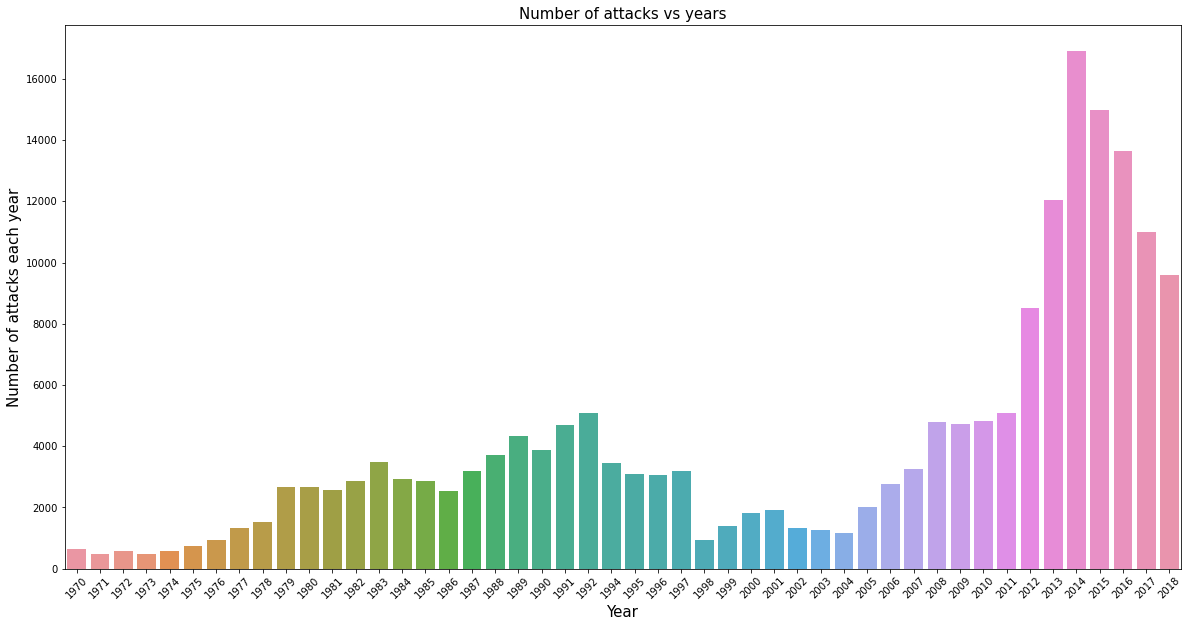

In [12]:
x=df['year'].unique()
y = df['year'].value_counts(dropna = False).sort_index()
plt.figure(figsize=(20,10))
sns.barplot(x,y)
plt.xticks(rotation = 45)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of attacks each year",fontsize=15)
plt.title("Number of attacks vs years",fontsize=15)
plt.show()

In [13]:
Reg=df['region'].unique()
df1=df.groupby(['region'])
x=df1['region'].count()
print(x)

region
Australasia & Oceania            304
Central America & Caribbean    10359
Central Asia                     571
East Asia                        808
Eastern Europe                  5217
Middle East & North Africa     53110
North America                   3579
South America                  19292
South Asia                     48266
Southeast Asia                 13363
Sub-Saharan Africa             19752
Western Europe                 16843
Name: region, dtype: int64


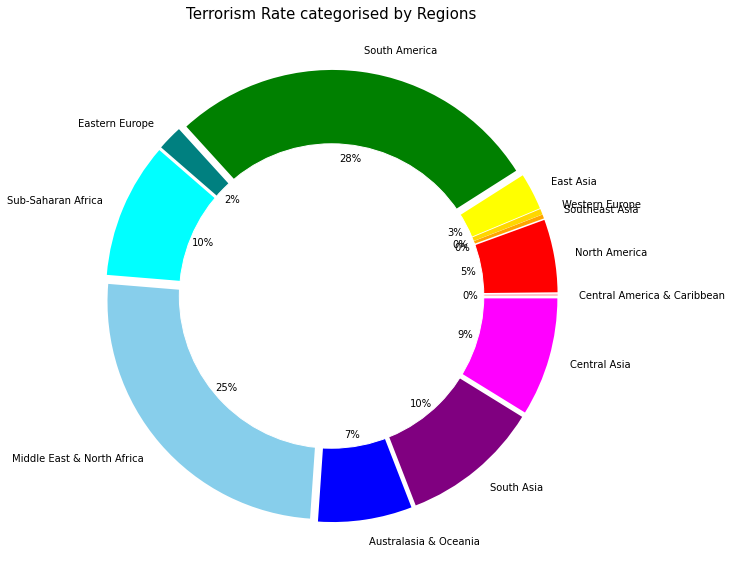

In [14]:
e = np.full(x.shape, 0.04)
c = ['pink','red','orange','gold','yellow','green','teal','cyan', 'skyblue', 'blue','purple','magenta']
plt.figure(figsize = (30,10))
plt.pie(x, labels = Reg, autopct='%1.0f%%', explode=e, colors=c)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Terrorism Rate categorised by Regions', fontsize=15)
plt.show()

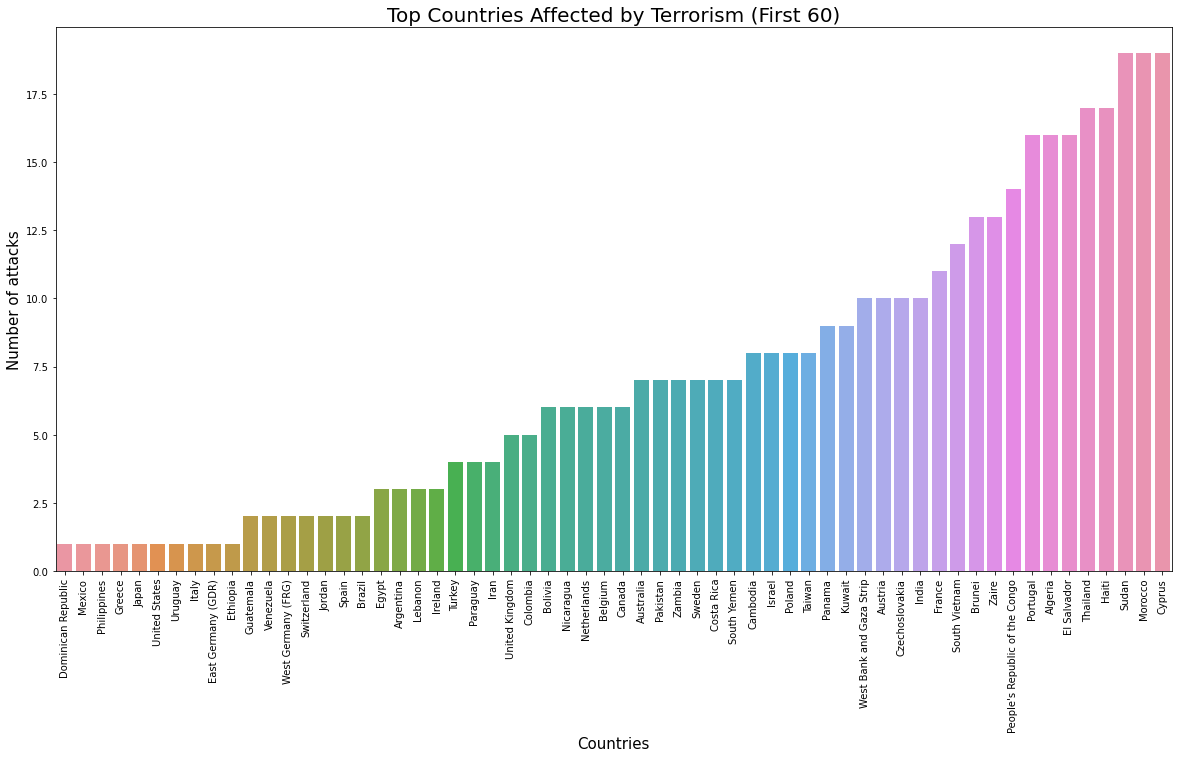

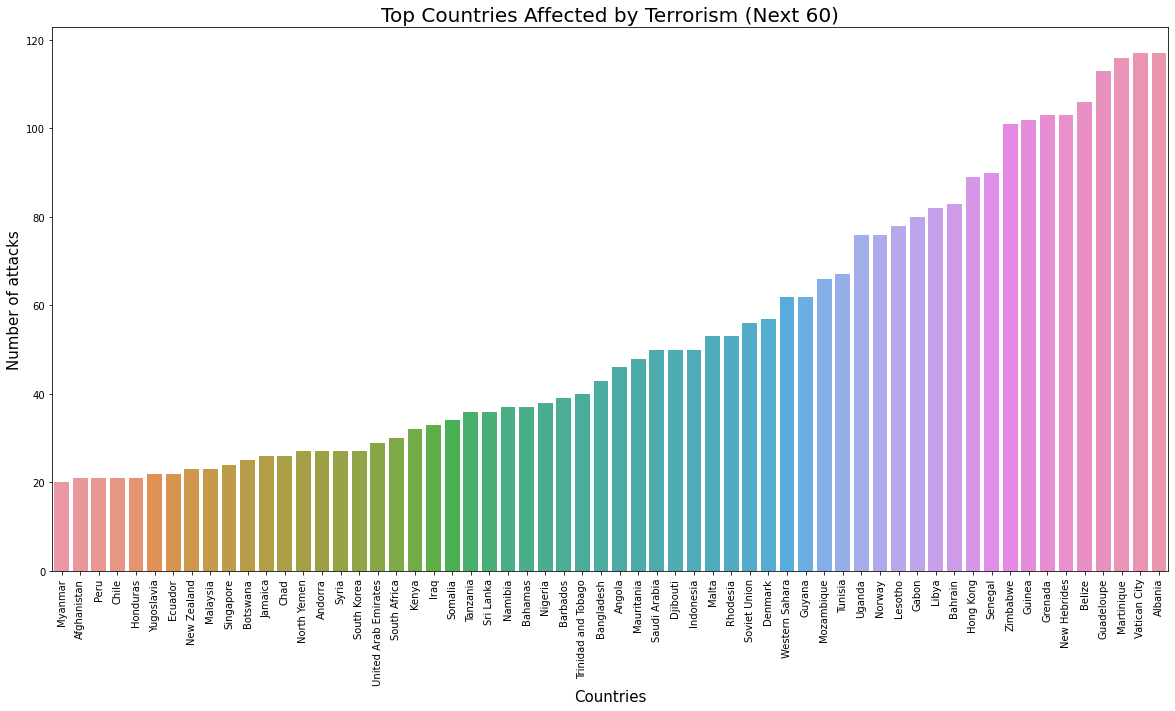

In [15]:
x=df['country'].unique()
df1=df.groupby(['country'])
y = df1['country'].count().sort_values()

plt.subplots(figsize=(20,10))
sns.barplot(x[0:60],y[0:60])
plt.title('Top Countries Affected by Terrorism (First 60)',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Number of attacks',fontsize=15)
plt.xticks(rotation= 90, fontsize=10)
plt.show()

plt.subplots(figsize=(20,10))
sns.barplot(x[60:120],y[60:120])
plt.title('Top Countries Affected by Terrorism (Next 60)',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Number of attacks',fontsize=15)
plt.xticks(rotation= 90, fontsize=10)
plt.show()


In [16]:
weapondata=df['weaptype_txt'].value_counts()
weapondata

Unknown Explosive Type                       46432
Unknown Gun Type                             35986
Unknown                                      22286
Automatic or Semi-Automatic Rifle            17670
Projectile (rockets, mortars, RPGs, etc.)    10461
Vehicle                                      10220
Other Explosive Type                          7515
Handgun                                       6886
Grenade                                       5496
Landmine                                      4636
Arson/Fire                                    4631
Suicide (carried bodily by human being)       3484
Remote Trigger                                2868
Knife or Other Sharp Object                   2765
Sticky Bomb                                   1744
Molotov Cocktail/Petrol Bomb                  1362
Rifle/Shotgun (non-automatic)                 1245
Dynamite/TNT                                  1240
Gasoline or Alcohol                            888
Time Fuse                      

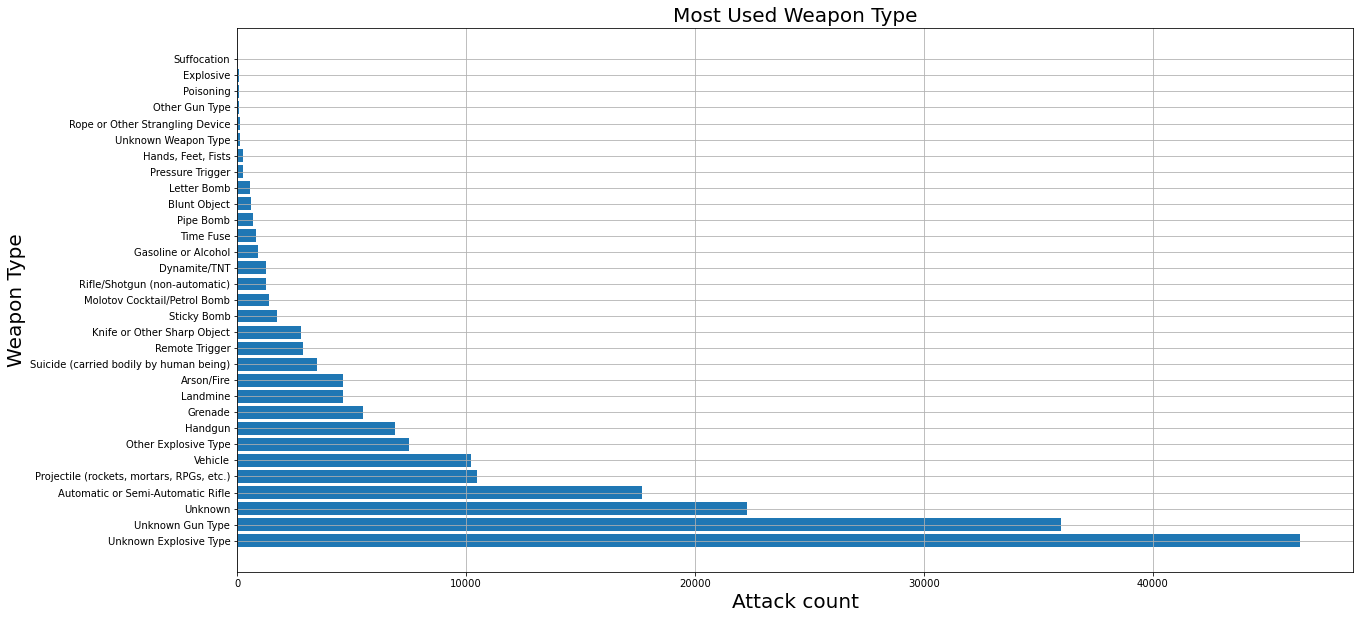

In [17]:
plt.figure(figsize= (20,10))
plt.barh(weapondata.index, weapondata.values)
plt.title('Most Used Weapon Type',fontsize=20)
plt.xlabel('Attack count',fontsize=20)
plt.ylabel('Weapon Type',fontsize=20)
plt.grid(True)
plt.show()

In [18]:
city = df['city'].value_counts().drop('Unknown').head(20)
print(city)

Baghdad           7765
Karachi           2673
Lima              2359
Mosul             2309
Belfast           2202
Mogadishu         1761
Santiago          1631
San Salvador      1560
Istanbul          1048
Athens            1038
Kirkuk             986
Bogota             986
Beirut             914
Benghazi           855
Medellin           850
Quetta             848
Kabul              847
Peshawar           829
Guatemala City     764
Baqubah            752
Name: city, dtype: int64


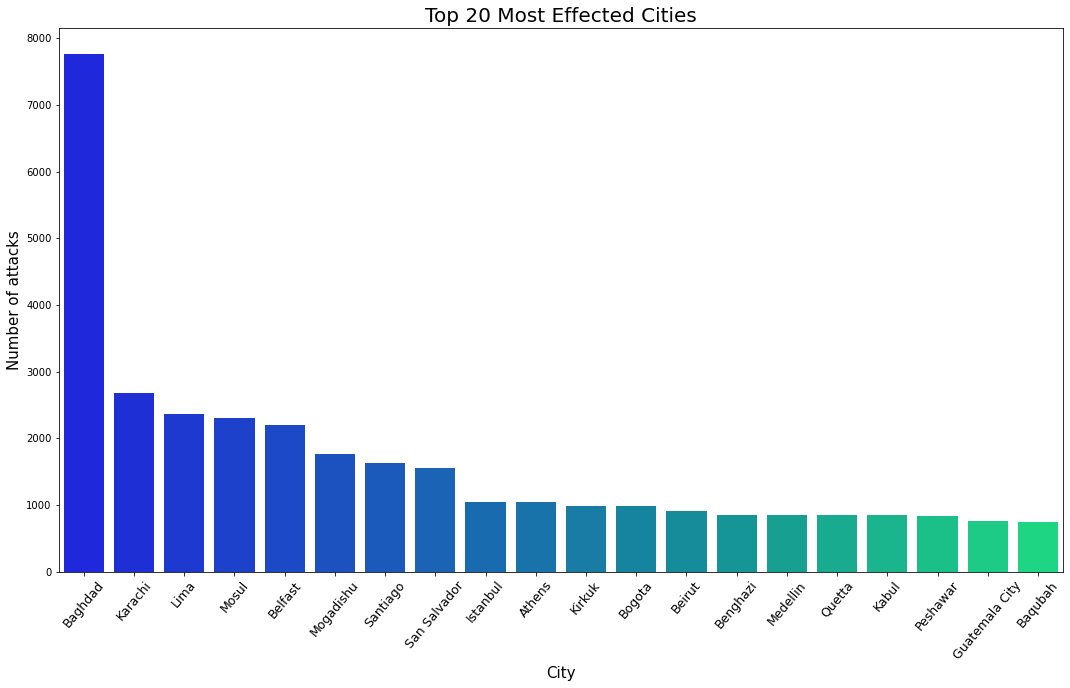

In [19]:
plt.figure(figsize=(18,10))
sns.barplot(x=city.index, y=city.values, palette='winter')
plt.xticks(rotation = 50,fontsize=12.5)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 20 Most Effected Cities",fontsize=20)
plt.show()

In [20]:
terrorist_group = df['gang_name'].value_counts().drop('Unknown').head(20)
print(terrorist_group)

Taliban                                             8727
Islamic State of Iraq and the Levant (ISIL)         6385
Shining Path (SL)                                   4562
Al-Shabaab                                          3774
Farabundo Marti National Liberation Front (FMLN)    3351
New People's Army (NPA)                             3054
Irish Republican Army (IRA)                         2669
Boko Haram                                          2665
Revolutionary Armed Forces of Colombia (FARC)       2490
Kurdistan Workers' Party (PKK)                      2427
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1960
Maoists                                             1818
National Liberation Army of Colombia (ELN)          1683
Liberation Tigers of Tamil Eelam (LTTE)             1606
Tehrik-i-Taliban Pakistan (TTP)                     1426
Houthi extremists (Ansar Allah)                     1330
Palestinians                   

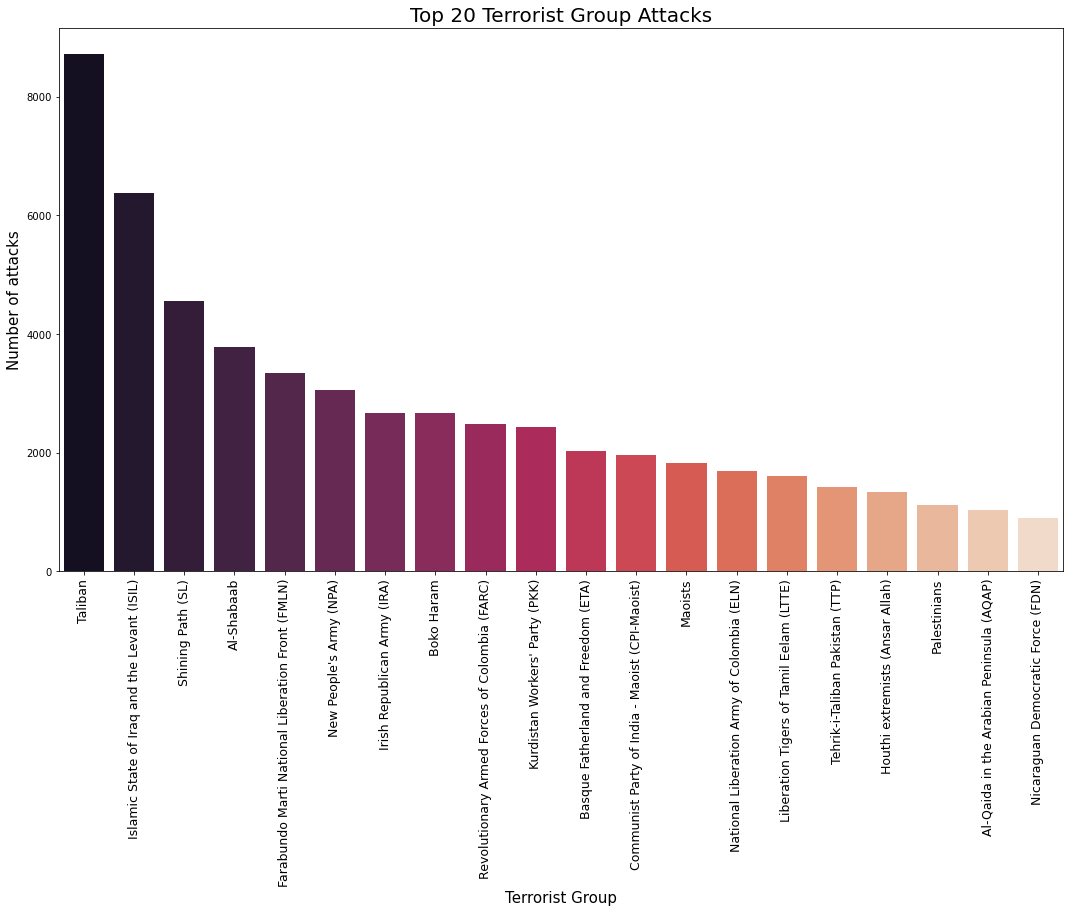

In [22]:
plt.figure(figsize=(18,10))
sns.barplot(x=terrorist_group.index, y=terrorist_group.values, palette='rocket')
plt.xticks(rotation = 90,fontsize=12.5)
plt.xlabel("Terrorist Group",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 20 Terrorist Group Attacks",fontsize=20)
plt.show()

In [23]:
Attack = df['attacktype'].value_counts().drop('Unknown')
print(Attack)

Bombing/Explosion                      91842
Armed Assault                          45251
Assassination                          20117
Hostage Taking (Kidnapping)            12138
Facility/Infrastructure Attack         11017
Unarmed Assault                         1096
Hostage Taking (Barricade Incident)     1048
Hijacking                                688
Name: attacktype, dtype: int64


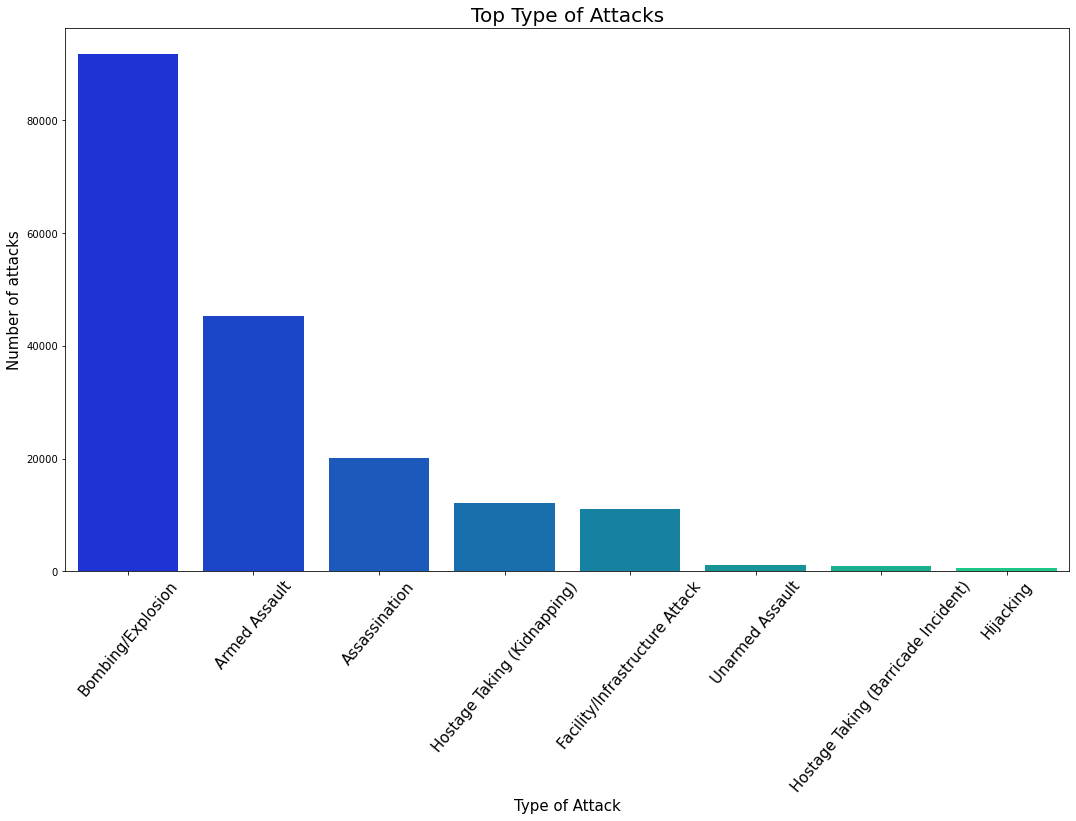

In [24]:
plt.figure(figsize=(18,10))
sns.barplot(x=Attack.index, y=Attack.values, palette='winter')
plt.xticks(rotation = 50,fontsize=15)
plt.xlabel("Type of Attack",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top Type of Attacks",fontsize=20)
plt.show()

In [29]:
target = df['targtype'].value_counts().drop('Unknown').head(20)
target

Unnamed Civilian/Unspecified                               12233
Police Security Forces/Officers                            11726
Military Unit/Patrol/Convoy                                 8599
Military Personnel (soldiers, troops, officers, forces)     8584
Village/City/Town/Suburb                                    7150
Government Personnel (excluding police, military)           6905
Politician or Political Party Movement/Meeting/Rally        6630
Police Building (headquarters, station, school)             6380
Military Barracks/Base/Headquarters/Checkpost               5746
Police Patrol (including vehicles and convoys)              5382
Government Building/Facility/Office                         4931
Retail/Grocery/Bakery                                       4394
Electricity                                                 4282
Bank/Commerce                                               3280
House/Apartment/Residence                                   3210
Vehicles/Transportation  

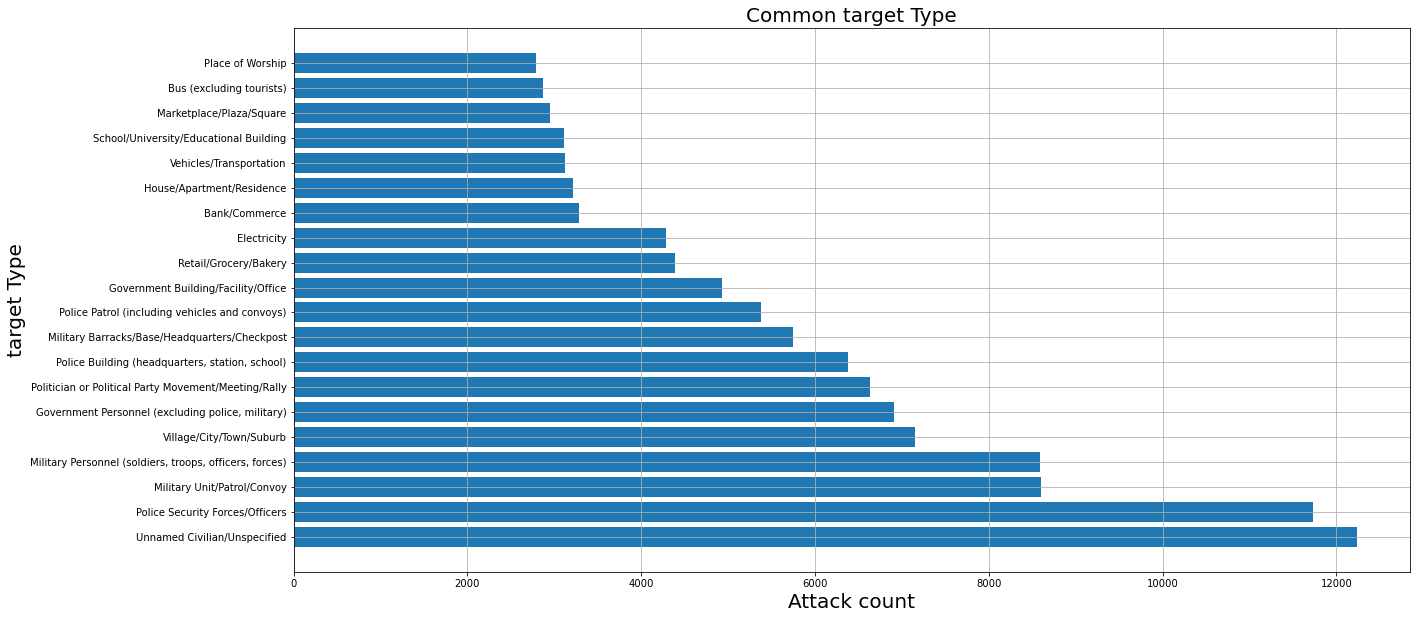

In [32]:
plt.figure(figsize= (20,10))
plt.barh(target.index, target.values)
plt.title('Common target Type',fontsize=20)
plt.xlabel('Attack count',fontsize=20)
plt.ylabel('target Type',fontsize=20)
plt.grid(True)
plt.show()

# MODELING

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encode_result = df.apply(label_encoder.fit_transform)

In [34]:
encode_result

,year,country,region,city,location of attack,targtype,gang_name,motive,weaptype_txt,propvalue,propcomment,dbsource,attacktype
0,0,47,1,32086,46625,59,1946,15524,26,682,19363,13,1
1,0,116,6,23921,46625,15,16,15524,26,682,19363,13,6
2,0,140,9,37186,46625,87,3485,15524,26,682,19363,13,1
3,0,68,11,2765,46625,19,3485,15524,27,682,19363,13,2
4,0,90,3,12139,46625,19,3485,15524,26,682,19363,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191459,47,0,8,34057,26276,73,3212,15524,0,0,2872,14,3
191460,47,0,8,18592,25780,52,3212,15524,26,0,19676,14,3
191461,47,0,8,10131,28595,4,3212,11227,26,682,19363,14,8
191462,47,0,8,25332,36961,73,3212,15524,26,682,19363,14,8


In [35]:
label_encoder.classes_

array(['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown'],
      dtype=object)

In [36]:
X = np.asarray(encode_result[['year','country','region','city','location of attack','targtype','gang_name','motive','weaptype_txt','propvalue','propcomment','dbsource']])
y= np.asarray(encode_result['attacktype'])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

In [42]:
from sklearn.tree import DecisionTreeClassifier
dclassifier = DecisionTreeClassifier()
dclassifier.fit(X_train, y_train)
dclassifier_pred = dclassifier.predict(X_test)
print(accuracy_score(y_test,  dclassifier_pred))

0.7923224233983287


In [43]:
a=confusion_matrix(y_test,dclassifier_pred)
a1=a.flatten()
x=a1[0:4]
print(x)
#[TP, FN, FP, TN]

[10254  1351   519   380]


In [44]:
labels = 'TruePositive', 'FalseNegative', 'FalsePositive', 'TrueNegative'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']


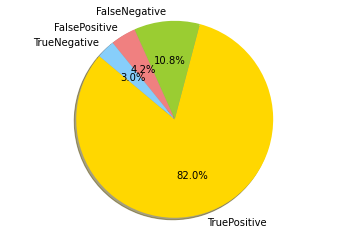

In [45]:
plt.pie(x ,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


In [46]:
from sklearn.ensemble import RandomForestClassifier
rclassifier = RandomForestClassifier(n_estimators=1000, random_state=0)
rclassifier.fit(X_train, y_train) 
rclassifier_pred = rclassifier.predict(X_test)
print(accuracy_score(y_test,  rclassifier_pred))

0.8377437325905293


In [47]:
a=confusion_matrix(y_test,rclassifier_pred)
a1=a.flatten()
x=a1[0:4]
print(x)
#[TP, FN, FP, TN]

[11541   797   706   233]


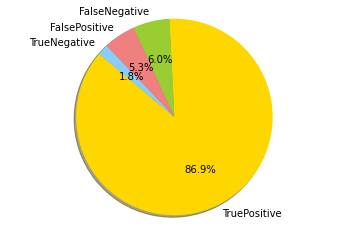

In [48]:
labels = 'TruePositive', 'FalseNegative', 'FalsePositive', 'TrueNegative'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plot
plt.pie(x, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [49]:
predicted=label_encoder.inverse_transform(dclassifier_pred)

In [50]:
predicted_df = pd.DataFrame(predicted, columns = ['prediction']) 
predicted_df


,prediction
0,Armed Assault
1,Armed Assault
2,Bombing/Explosion
3,Armed Assault
4,Armed Assault
...,...
57435,Facility/Infrastructure Attack
57436,Facility/Infrastructure Attack
57437,Armed Assault
57438,Bombing/Explosion


In [51]:
data = [df["attacktype"], predicted_df["prediction"]]

In [53]:
headers = ["Actual Attack", "Predicted Attack"]

In [54]:
predicted_df = pd.concat(data, axis=1, keys=headers)

In [55]:
predicted_df

,Actual Attack,Predicted Attack
0,Assassination,Armed Assault
1,Hostage Taking (Kidnapping),Armed Assault
2,Assassination,Bombing/Explosion
3,Bombing/Explosion,Armed Assault
4,Facility/Infrastructure Attack,Armed Assault
...,...,...
191459,Facility/Infrastructure Attack,NaN
191460,Facility/Infrastructure Attack,NaN
191461,Unknown,NaN
191462,Unknown,NaN


In [62]:
test=['2022','Afghanistan','South Asia','Nad Ali district','Unknown','Unknown','Taliban',
      'Unknown','Unknown','Unknown','Unknown','START Primary Collection']

In [63]:
encoded=list()
c=0
while c<12:#c = column
    r=0
    val=""
    for i in df.iloc[:,c]:#i = single value of each row and column
        i=str(i)
        #print('above',r,c,i,test[c])
        if i==test[c]:
            val=encode_result.iloc[r,c]
        r=r+1
    if val=="":
        val=44
    encoded.append(val)
    c=c+1
encoded


[44, 0, 8, 25332, 46625, 108, 3212, 15524, 26, 682, 19363, 14]

In [64]:
pred = dclassifier.predict([encoded])

In [65]:
pred

array([6])

In [66]:
result = label_encoder.inverse_transform(pred)

In [67]:
print("Attack could be:: ", np.array_str(result))

Attack could be::  ['Hostage Taking (Kidnapping)']
